In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import plotly.graph_objects as go
import missingno as msno

from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score, classification_report
from scipy import stats

In [2]:
train = pd.read_csv('../input/wine-quality-dataset/WineQT.csv')

In [3]:
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [4]:
train=train.set_index('Id')

<a id="title-two"></a>
<h1 style=' border:2; border-radius: 10px; color:black'><center>DATA INFORMATION</center></h1>

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


What features are in the dataset?

* fixed acidity. Fixed acidity is due to the presence of non-volatile acids in wine. For example, tartaric, citric or malic acid. This type of acid combines the balance of the taste of wine, brings freshness to the taste.

* Volatile acidity is the part of the acid in wine that can be picked up by the nose. Unlike those acids that are palpable to the taste (as we talked about above). Volatile acidity, or in other words, souring of wine, is one of the most common defects.

* citric acid - allowed to offer in winemaking by the Resolution of the OIV No. 23/2000. It can be used in three cases: for acid treatment of wine (increasing acidity), for collecting wine, for cleaning filters from possible fungal and mold infections.

* residual sugar is that grape sugar that has not been fermented in alcohol

* chlorides. The structure of the wine also depends on the content of minerals in the wine, which determine the taste sensation such as salinity (sapidità).
Anions of inorganic acids (chlorides, sulfates, sulfites..), anions of transferred acids, metal cations (potassium, sodium, magnesium...) are found in wine. Their content depends mainly on the climatic zone (cold or warm region, salty soils depending on the observation of the sea), oenological practices, storage and aging of wine.

* free sulfur dioxide, total sulfur dioxide - Sulfur dioxide (sulfur oxide, sulfur dioxide, readiness E220, SO2) is used as a preservative due to its antioxidant and antimicrobial properties. Molecular SO2 is an extremely important antibiotic, affecting significant consumption (including wild yeast) that can manifest itself in wine spoilage.


* Density - The density of wine can be either less or more than water. Its value is determined primarily by the concentration of alcohol and sugar. White, rosé and red wines are generally light - their density at 20°C is below 998.3 kg/m3.

* pH is a measure of the acidity of wine. All wines ideally have a pH level between 2.9 and 4.2. The lower the pH, the more acidic the wine; the lower the pH, the less acidic the wine.

* Sulfates are a natural result of yeast fermenting the sugar in wine into alcohol. That is, the presence of sulfites in wine is excluded.

* alcohol - The alcohol content in wines depends on many tastes: the grape variety and the amount of sugar in the berries, production technology and growing conditions. Wines vary greatly in degree: this Parameter varies from 4.5 to 22 depending on the category.

* quality is a target.


<a id="title-three"></a>
<h1 style='background:#FA8072; border:2; border-radius: 10px; color:black'><center>EXPLORATORY DATA ANALYSIS</center></h1>

Let's look at gaps

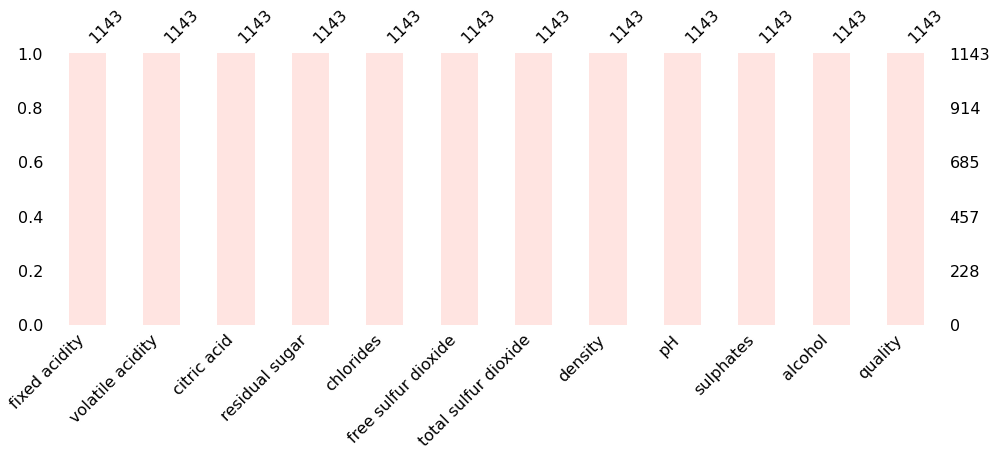

In [6]:
msno.bar(train, figsize = (16,5),color = "#FFE4E1")
plt.show()

Great, no missing information!

In [7]:
train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                              
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                          
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality  
Id                      
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  

[1143 rows x 12 columns]

Let's look at the statistics of the dataset

In [8]:
train.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043  
std       0.156664     0.170399     1.082196     0.805824  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.205000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [9]:
columns=train.columns

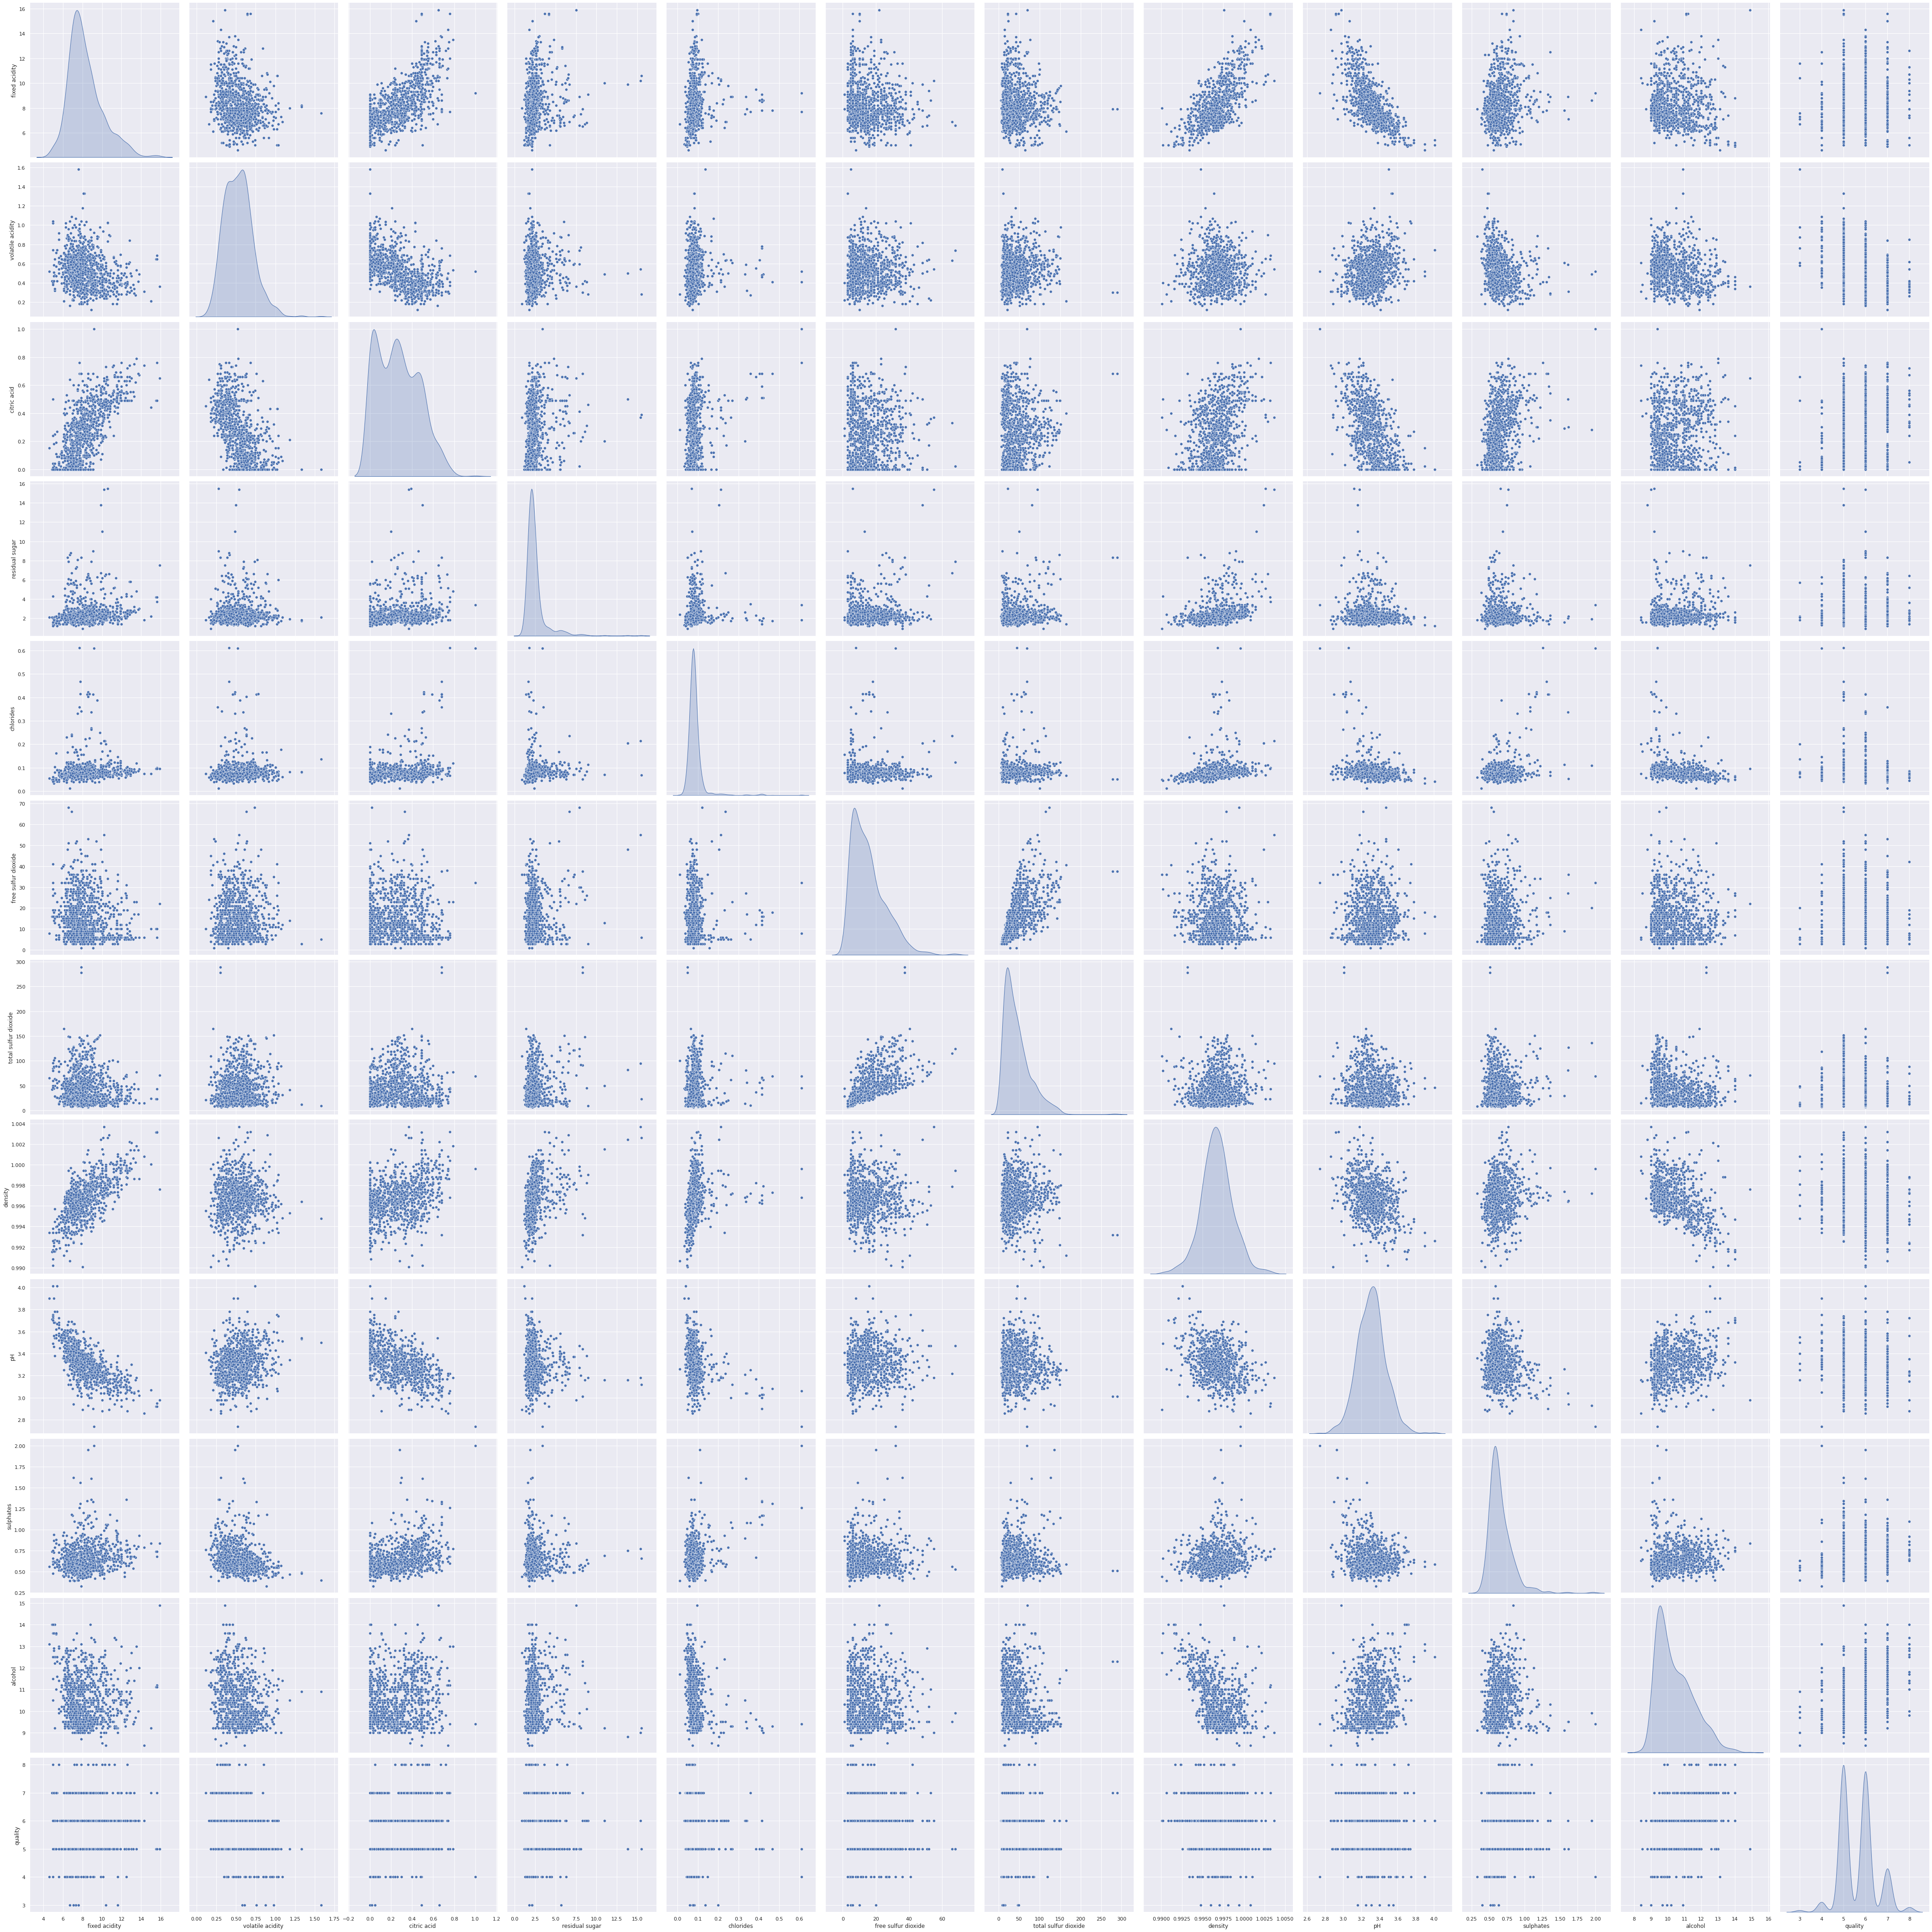

In [10]:
sns.set()
sns.pairplot(train[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

Let's look at the quantitative distribution of the target variable

In [11]:
fig = go.Figure(data=[go.Pie(labels=train['quality'].value_counts().index, values=train['quality'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Quality')
fig.show()

Lets look at continuous columns

Text(0.5, 0.98, 'Visualizing continuous columns')

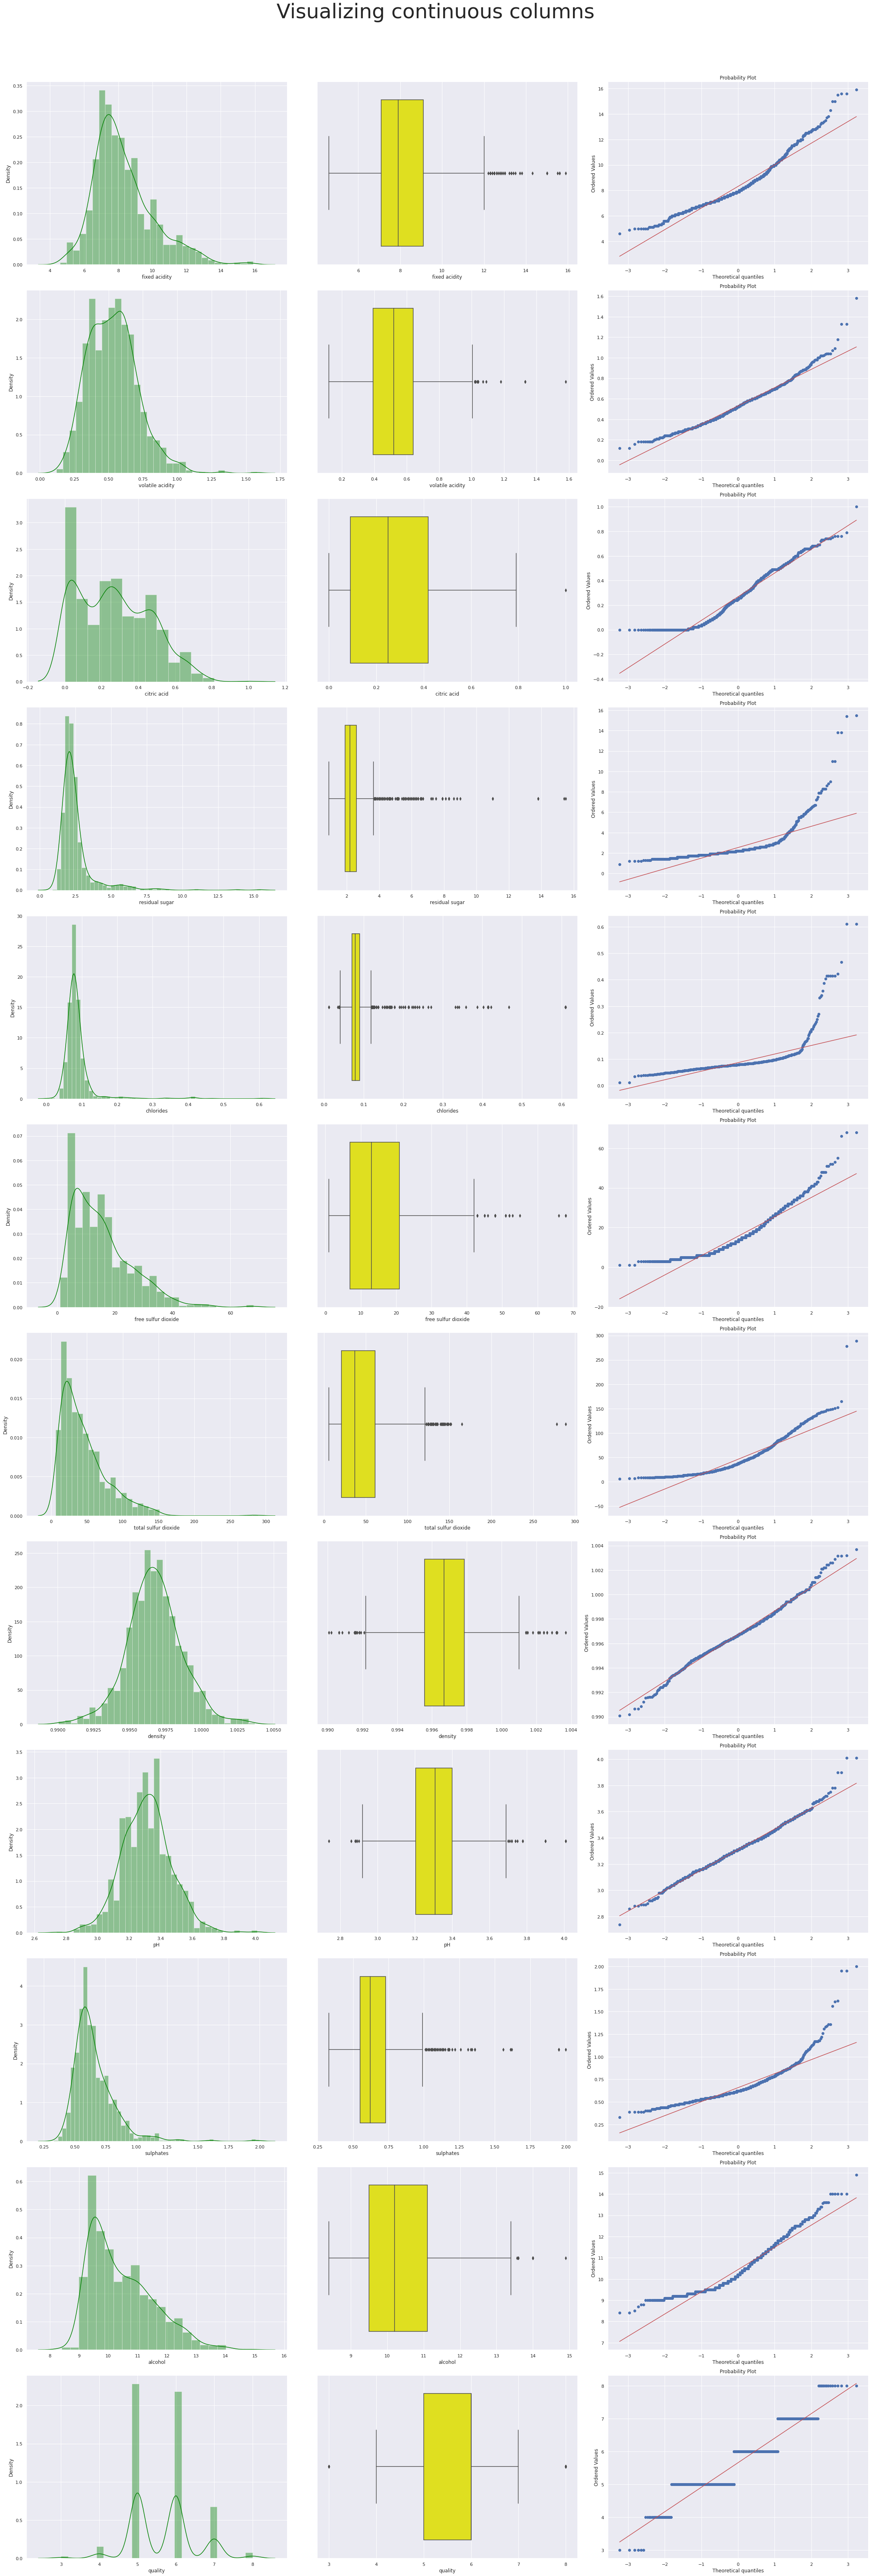

In [12]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(12,3,figsize=(30,90))
for index,i in enumerate(train.columns):
    sns.distplot(train[i],ax=ax[index,0],color='green')
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    stats.probplot(train[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns",fontsize=50)

<a id="title-four"></a>
<h1 style='background:#FA8072; border:2; border-radius: 10px; color:black'><center>STATISTICAL TESTS</center></h1>

In [13]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'fixed acidity' has '91' unique values
Feature 'volatile acidity' has '135' unique values
Feature 'citric acid' has '77' unique values
Feature 'residual sugar' has '80' unique values
Feature 'chlorides' has '131' unique values
Feature 'free sulfur dioxide' has '53' unique values
Feature 'total sulfur dioxide' has '138' unique values
Feature 'density' has '388' unique values
Feature 'pH' has '87' unique values
Feature 'sulphates' has '89' unique values
Feature 'alcohol' has '61' unique values
Feature 'quality' has '6' unique values


because the predicted variable is nominative, and the rest is quantitative, then we use the Mann-Whitney U-test. In what follows, we construct the Spearman correlation matrix.

In [14]:
import scipy.stats

# u : Mann-Whitney test statistic
# p : p-value
for feature in train.columns:
  u, p = scipy.stats.mannwhitneyu(train['quality'], train[feature])
  print('With',feature)
  print('Mann-Whitney test statistic:',u)
  print('p-value:',p)
  print('--------------------')

With fixed acidity
Mann-Whitney test statistic: 66226.0
p-value: 9.63134461738031e-309
--------------------
With volatile acidity
Mann-Whitney test statistic: 1306449.0
p-value: 0.0
--------------------
With citric acid
Mann-Whitney test statistic: 1306449.0
p-value: 0.0
--------------------
With residual sugar
Mann-Whitney test statistic: 1252515.0
p-value: 0.0
--------------------
With chlorides
Mann-Whitney test statistic: 1306449.0
p-value: 0.0
--------------------
With free sulfur dioxide
Mann-Whitney test statistic: 188217.0
p-value: 8.301665837510123e-197
--------------------
With total sulfur dioxide
Mann-Whitney test statistic: 645.0
p-value: 0.0
--------------------
With density
Mann-Whitney test statistic: 1306449.0
p-value: 0.0
--------------------
With pH
Mann-Whitney test statistic: 1299678.0
p-value: 0.0
--------------------
With sulphates
Mann-Whitney test statistic: 1306449.0
p-value: 0.0
--------------------
With alcohol
Mann-Whitney test statistic: 0.0
p-value: 0.0
-

In [15]:
correlation = train.corr()
print(correlation['quality'].sort_values(ascending = False),'\n')

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64 



Index(['quality', 'alcohol', 'sulphates', 'citric acid', 'fixed acidity',
       'residual sugar', 'pH', 'free sulfur dioxide', 'chlorides', 'density'],
      dtype='object')


<AxesSubplot:>

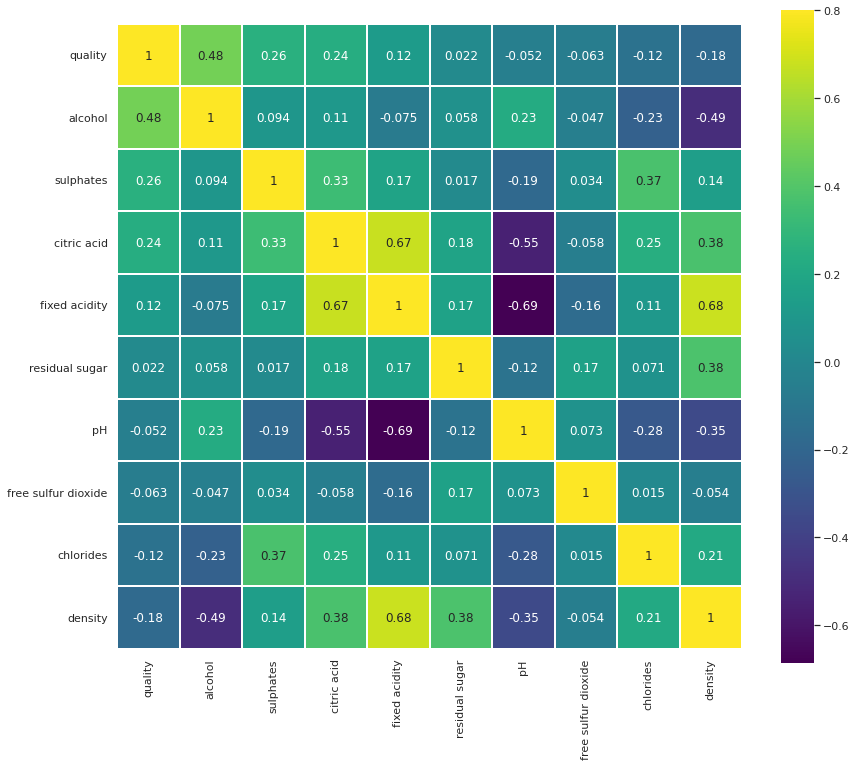

In [16]:
k= 10
cols = correlation.nlargest(k,'quality')['quality'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

<a id="title-five"></a>
<h1 style='background:#FA8072; border:2; border-radius: 10px; color:black'><center>FEATURE ENGENEERING AND MACHINE LEARNING</center></h1>

In [17]:
from imblearn.over_sampling import SMOTE 

In [18]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(train.drop(["quality"],axis=1),train["quality"])

In [19]:
scaler = preprocessing.MinMaxScaler()
names = features.columns
d = scaler.fit_transform(features)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149254              0.098940  0.567548  0.606299   0.137725   
1             0.358209              0.215548  0.494126  0.362205   0.209581   
2             0.208955              0.169611  0.508811  0.409449   0.191617   
3             0.238806              0.190813  0.582232  0.330709   0.149701   
4             0.149254              0.098940  0.567548  0.606299   0.137725   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  
3  0.215385  
4  0.153846

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [21]:
X_train, X_test, y_train, y_test=train_test_split(scaled_df,labels,test_size=0.33,random_state=42)

We will build model baselines, choose the best one and find the optimal hyperparameters.

In [22]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

           3       0.97      1.00      0.99       156
           4       0.90      0.99      0.94       157
           5       0.80      0.75      0.78       168
           6       0.72      0.55      0.63       166
           7       0.79      0.94      0.86       159
           8       0.97      0.96      0.96       151

    accuracy                           0.86       957
   macro avg       0.86      0.87      0.86       957
weighted avg       0.86      0.86      0.85       957

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           3       0.89      1.00      0.94       156
           4       0.73      0.98      0.84       157
           5       0.68      0.43      0.53       168
           6       0.50      0.34      0.41       166
           7       0.72      0.79      0.75       159
           8       0.84      0.99    

find the optimal hyperparameters of the model.

In [23]:
!pip install optuna

In [24]:
import optuna
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
def objective(trial):
    data, target = scaled_df,labels
    train_x, valid_x, train_y, valid_y = train_test_split(scaled_df,labels, test_size=0.3)

    param = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
        "criterion": trial.suggest_categorical("criterion", ['gini', 'entropy']),
        "max_depth": trial.suggest_int("max_depth", 2, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 10)
    }

    rf = RandomForestClassifier(**param)

    rf.fit(train_x, train_y)

    preds = rf.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2022-08-16 10:55:13,891] A new study created in memory with name: no-name-ac06308e-36b2-49d9-aa31-7e8626765082
[I 2022-08-16 10:55:14,351] Trial 0 finished with value: 0.8310344827586207 and parameters: {'n_estimators': 52, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8310344827586207.
[I 2022-08-16 10:55:14,699] Trial 1 finished with value: 0.7367816091954023 and parameters: {'n_estimators': 49, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8310344827586207.
[I 2022-08-16 10:55:16,190] Trial 2 finished with value: 0.6586206896551724 and parameters: {'n_estimators': 416, 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8310344827586207.
[I 2022-08-16 10:55:16,695] Trial 3 finished with value: 0.7931034482758621 and parameters: {'n_estimators': 95, 'criterion': 'gini', 'max_

Number of finished trials: 100
Best trial:
  Value: 0.8655172413793103
  Params: 
    n_estimators: 710
    criterion: entropy
    max_depth: 24
    min_samples_split: 4
    min_samples_leaf: 2


Let's evaluate the prediction

In [26]:
from optuna import visualization
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))
hist = study.trials_dataframe()
hist.head()

Best trial: score 0.8655172413793103,
params {'n_estimators': 710, 'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 2}


number     value             datetime_start          datetime_complete  \
0       0  0.831034 2022-08-16 10:55:13.894404 2022-08-16 10:55:14.350988   
1       1  0.736782 2022-08-16 10:55:14.353095 2022-08-16 10:55:14.698578   
2       2  0.658621 2022-08-16 10:55:14.700629 2022-08-16 10:55:16.189565   
3       3  0.793103 2022-08-16 10:55:16.191753 2022-08-16 10:55:16.695402   
4       4  0.782759 2022-08-16 10:55:16.697283 2022-08-16 10:55:18.605644   

                duration params_criterion  params_max_depth  \
0 0 days 00:00:00.456584          entropy                15   
1 0 days 00:00:00.345483          entropy                 8   
2 0 days 00:00:01.488936             gini                 4   
3 0 days 00:00:00.503649             gini                19   
4 0 days 00:00:01.908361             gini                29   

   params_min_samples_leaf  params_min_samples_split  params_n_estimators  \
0                        2                         6                   52   
1                       10                         8                   49   
2                        3                         7                  416   
3                        7                         5                   95   
4                       10                         6                  389   

      state  
0  COMPLETE  
1  COMPLETE  
2  COMPLETE  
3  COMPLETE  
4  COMPLETE

In [27]:
optuna.visualization.plot_slice(study)

In [28]:
optuna.visualization.plot_optimization_history(study)

<a id="title-six"></a>
<h1 style='background:#FA8072; border:2; border-radius: 10px; color:black'><center>RECOMENDATIONS</center></h1>

* First of all, you need to understand for what purposes we choose alcohol? If you want to stew meat in red wine or prepare a sauce for a dinner dish, there is no need to spend huge sums - anyway, the taste of the drink will not be fully revealed. Or maybe you are planning to serve spicy mulled wine to your guests in the evening? Agree, you should not spend a lot of money on a bottle of wine to warm it up with spices and fruits. Keep in mind, mulled wine made from specially selected wine will be beyond praise.
* The production of high-quality wine is a costly, time-consuming and labor-intensive process, so the buyer should always be embarrassed by too low a price. The exception is profitable offers or promotions for bottles, which initially cost much more.
* Most drinks lose their taste over time. The wines of some regions of France (Bordeaux, Burgundy, Champagne) really reveal their taste and aroma with an aging of 5-10 years, but such wine is very expensive. Try to take young wines: whites and rosés are harvested last year, reds are grapes harvested 3-5 years ago. It is in the first years of life that most wines have a pleasant rich taste and aroma. The vintage year of the wine and the date of bottling most often differ. If the difference between these dates is large, then the wine was most likely aged in barrels. This undoubtedly affected its flavor and aroma properties.

# Thanks for viewing my kernel! Rate and leave comments on the work that you would like to explore and add to my work!